## Name - Rahul Kumar Yadav
## Collage - Suresh Gyan Vihar University Jaipur Rajasthan
## Student id -CA/A1/5414 


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name california_housing exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


First few rows of the dataframe:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Column information:
<class 'pandas.core.

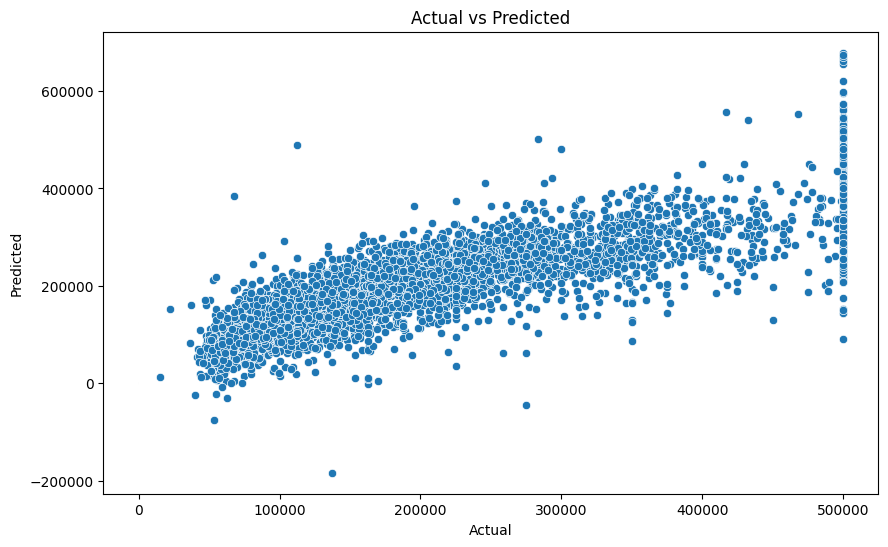

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

def load_california_housing():
    # Fetch the California housing dataset from OpenML
    california = fetch_openml(name="california_housing", as_frame=True)
    return california.frame

def show_data_info(data):
    # Display the first few rows of the dataframe
    print("First few rows of the dataframe:")
    print(data.head())
    print("\n")

    # Display column information
    print("Column information:")
    print(data.info())
    print("\n")

    # Display summary statistics
    print("Summary statistics:")
    print(data.describe())
    print("\n")

def preprocess_data(data):
    # Check for missing values
    print("Missing values before cleaning:")
    print(data.isnull().sum())
    print("\n")

    # Drop rows with missing values
    data = data.dropna()

    # Check for potential outliers
    print("Potential outliers:")
    print(data[(np.abs(data['longitude']) > 130) | (np.abs(data['latitude']) > 40)])
    print("\n")

    # Define features and target
    X = data.drop('median_house_value', axis=1)
    y = data['median_house_value']

    # Convert categorical variables using get_dummies
    X = pd.get_dummies(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def train_linear_regression(X_train, y_train):
    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")

    # Display predictions alongside actual values
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("Sample of actual vs predicted values:")
    print(results.head())
    print("\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([0, 5], [0, 5], '--k')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

def main():
    # Load the California housing dataset
    california_data = load_california_housing()

    # Show data information
    show_data_info(california_data)

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(california_data)

    # Train the linear regression model
    model = train_linear_regression(X_train, y_train)

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    main()